In [28]:
import astropy.io.fits as fits
from astropy.nddata import Cutout2D
from astropy import units as u
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from astropy.visualization import ZScaleInterval
from pathlib import Path



In [105]:
diff = Path('../../Templatesub/workdir/nerdrage/elp1m008-fa05-20200620-0063-e91diff.fits')
curr = Path('../../Photometry/LCOGT/elp1m008-fa05-20200620-0063-e91.fits')
curr = diff
savepath = Path.joinpath(Path('../../Templatesub/workdir/') / 'cutout',curr.stem+'_cutout'+curr.suffix).resolve()

In [106]:
f = fits.open(curr)
hdu = f[0]
wcs_init = WCS(hdu.header)
hdu.wcs = wcs_init
hdu.wcs

Set OBSGEO-B to    30.679833 from OBSGEO-[XYZ].
Set OBSGEO-H to     2026.994 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 256.725792788  30.2700913854  
CRPIX : 2048.5  2048.5  
CD1_1 CD1_2  : -0.000108201225185  -1.15665775204e-06  
CD2_1 CD2_2  : -1.15665775204e-06  0.000108201225185  
NAXIS : 4096  4096

In [107]:
cut = Cutout2D(
    f[0].data,
    position=wcs_init.wcs.crpix,
    wcs=wcs_init,
    size=(4030,4096)
    )

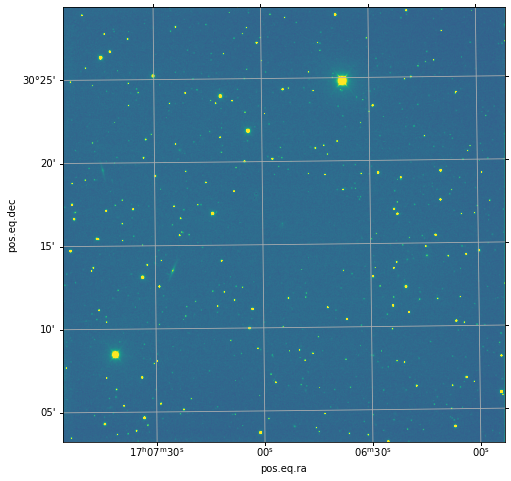

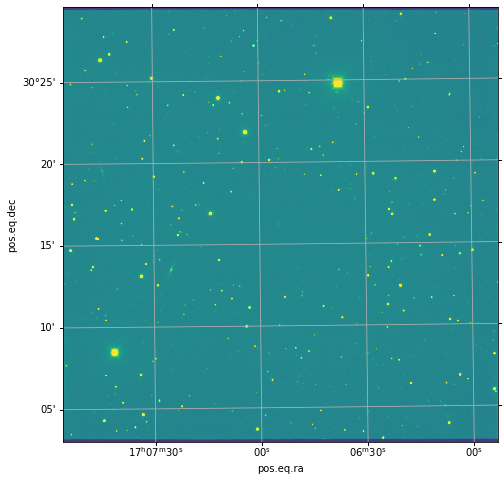

In [108]:
def plot_img(hdu,wcs='None',figsize=(8,8)):
    data = hdu.data
    if wcs=='None':
        wcs = hdu.wcs
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection=wcs)
    zs = ZScaleInterval(nsamples=1000)
    vmin,vmax = zs.get_limits(hdu.data)
    ax.imshow(hdu.data,vmin=vmin,vmax=vmax)
    ax.grid()
    
    return fig,ax


fig, ax = plot_img(cut)
fig2, ax2 = plot_img(hdu)

In [109]:
f.close()

In [110]:
w = fits.PrimaryHDU(cut.data,cut.wcs.to_header())

In [111]:
w.writeto(savepath, output_verify='exception', overwrite=True, checksum=False)